# EDA - 1

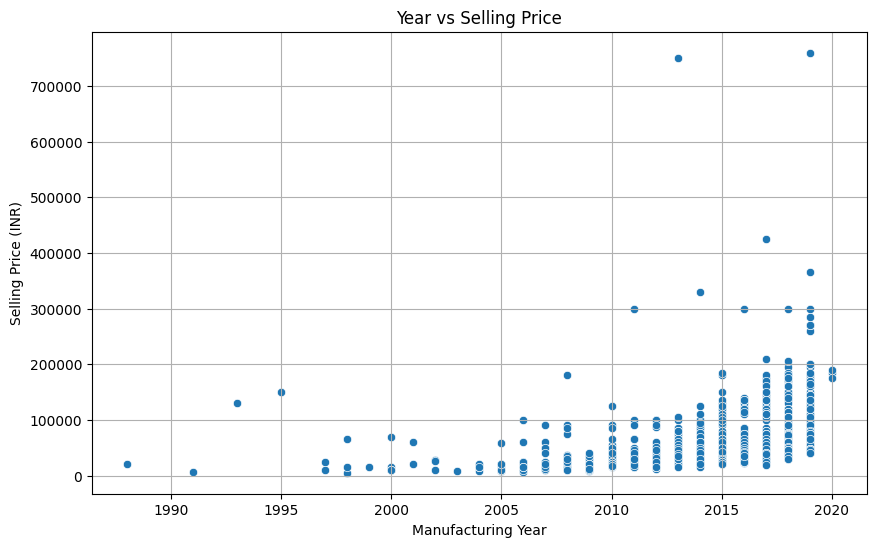

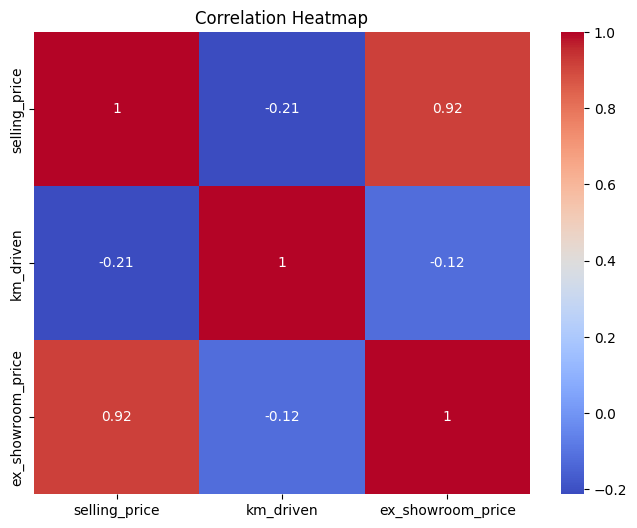

1. Range of Selling Prices: (5000, 760000)
2. Median Selling Price: 45000.0
3. Most Common Seller Type: Individual
4. Bikes Driven > 50,000 km: 170
5. Average km_driven by Ownership Type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
6. Proportion of Bikes (<=2015): 0.57
7. Missing Values:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
8. Highest Ex-Showroom Price Bike:
                            name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0
9. Total Bikes per Seller Type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
10. Correlation (1st Owner - Price vs km): -0.24
11. Bikes after Removing Outliers (km_driven): 1022
13. Average Depreciation by Age:
 bike_age
5     183333.333333
6     11

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Clean 'owner' column
df['owner'] = df['owner'].astype(str)

# 1. Range of selling prices
price_range = (df['selling_price'].min(), df['selling_price'].max())

# 2. Median selling price
median_price = df['selling_price'].median()

# 3. Most common seller type
most_common_seller_type = df['seller_type'].value_counts().idxmax()

# 4. Bikes driven more than 50,000 km
bikes_over_50000_km = df[df['km_driven'] > 50000].shape[0]

# 5. Average km_driven per owner type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()

# 6. Proportion of bikes from 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / df.shape[0]

# 7. Missing values trend
missing_values = df.isnull().sum()

# 8. Highest ex_showroom_price and corresponding bike
highest_ex_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_price][['name', 'ex_showroom_price']]

# 9. Bikes listed by each seller type
bikes_per_seller_type = df['seller_type'].value_counts()

# 10. Correlation between selling_price and km_driven for 1st owner bikes
first_owner_df = df[df['owner'].str.lower().str.contains("1st")]
first_owner_corr = first_owner_df[['selling_price', 'km_driven']].corr().iloc[0, 1]

# 11. Remove outliers in km_driven using IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_km_cleaned = df[(df['km_driven'] >= Q1 - 1.5 * IQR) & (df['km_driven'] <= Q3 + 1.5 * IQR)]

# 12. Year vs Selling Price bivariate analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs Selling Price')
plt.xlabel('Manufacturing Year')
plt.ylabel('Selling Price (INR)')
plt.grid(True)
plt.show()

# 13. Average depreciation based on bike's age
df['bike_age'] = 2025 - df['year']
avg_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

# 14. Bikes priced significantly above average for their year
year_avg_price = df.groupby('year')['selling_price'].mean()
df['year_avg_price'] = df['year'].map(year_avg_price)
above_avg_bikes = df[df['selling_price'] > 1.5 * df['year_avg_price']][['name', 'year', 'selling_price']]

# 15. Correlation matrix heatmap for numeric columns
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Print outputs for reference
print("1. Range of Selling Prices:", price_range)
print("2. Median Selling Price:", median_price)
print("3. Most Common Seller Type:", most_common_seller_type)
print("4. Bikes Driven > 50,000 km:", bikes_over_50000_km)
print("5. Average km_driven by Ownership Type:\n", avg_km_by_owner)
print("6. Proportion of Bikes (<=2015):", round(proportion_2015_or_older, 2))
print("7. Missing Values:\n", missing_values)
print("8. Highest Ex-Showroom Price Bike:\n", bike_with_highest_price)
print("9. Total Bikes per Seller Type:\n", bikes_per_seller_type)
print("10. Correlation (1st Owner - Price vs km):", round(first_owner_corr, 2))
print("11. Bikes after Removing Outliers (km_driven):", df_km_cleaned.shape[0])
print("13. Average Depreciation by Age:\n", avg_depreciation_by_age)
print("14. Above-Average Priced Bikes:\n", above_avg_bikes.head())


# EDA - 2

Saving Car Sale.csv to Car Sale.csv
Loaded file: Car Sale.csv
Columns in dataset:
Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
Columns 'Dealer Name' or 'Price ($)' not found.

Car brand with highest price variation:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


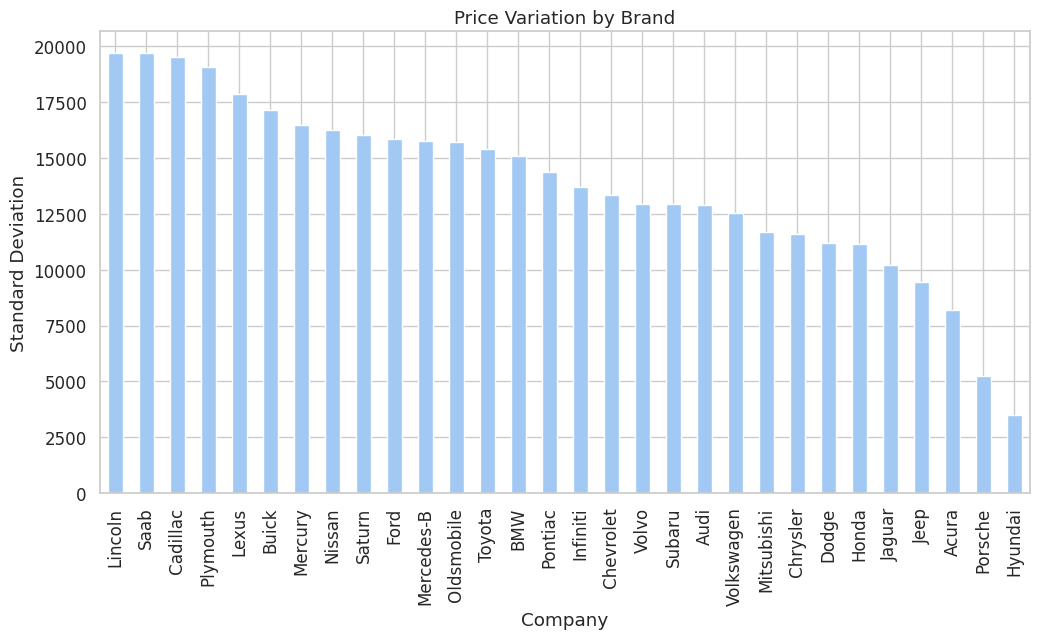


Price distribution statistics by transmission:
                  25%      50%      75%
Transmission                           
Auto          19000.0  24000.0  35500.0
Manual        17000.0  22001.0  34000.0


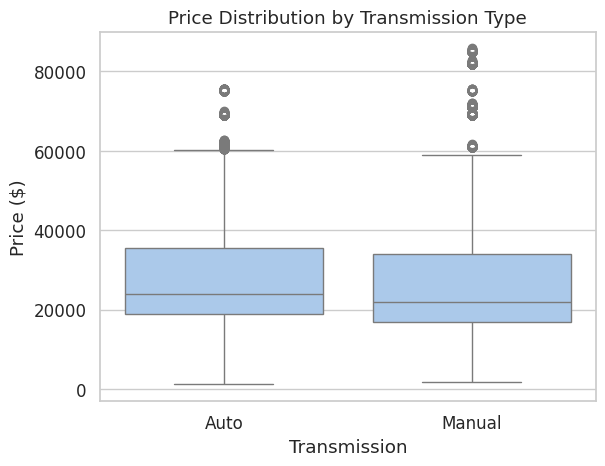

Columns 'Dealer Region' or 'Price ($)' not found.

Car counts by body style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


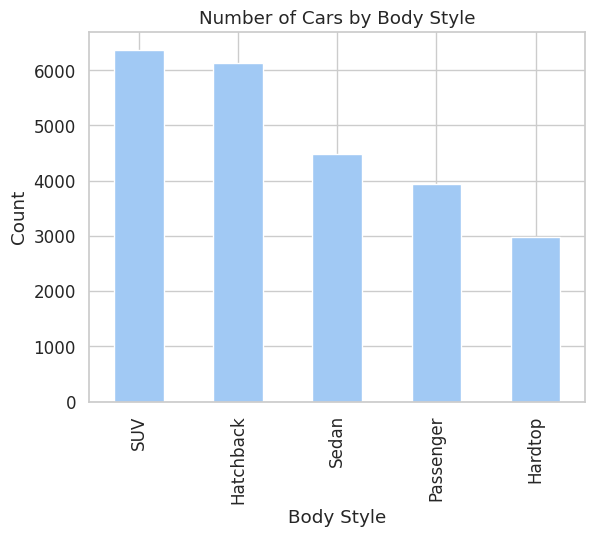


Average price and income by gender:
           Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207


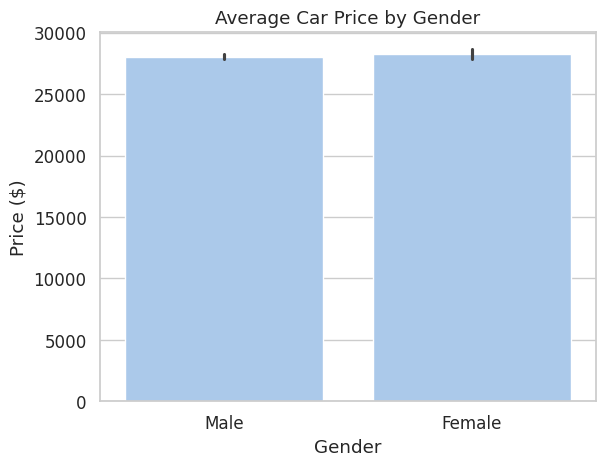

Columns 'Dealer Region' or 'Price ($)' not found.

Average car price by engine type:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


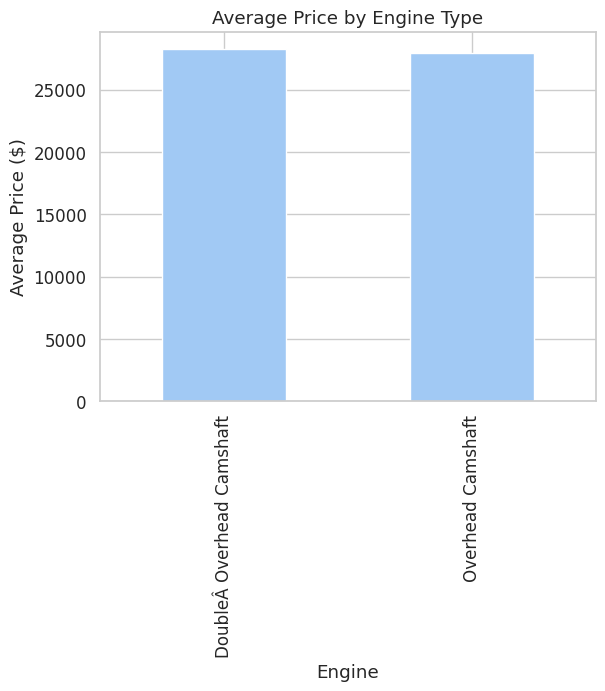


Average price by income bracket:
Income Bracket
<50k         27884.29782
50k-100k     43000.00000
100k-150k    23200.20000
150k-200k    22650.40000
200k+        28152.04346
Name: Price ($), dtype: float64


<ipython-input-13-a7a52afada2f>:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bracket_price = df.groupby('Income Bracket')['Price ($)'].mean()


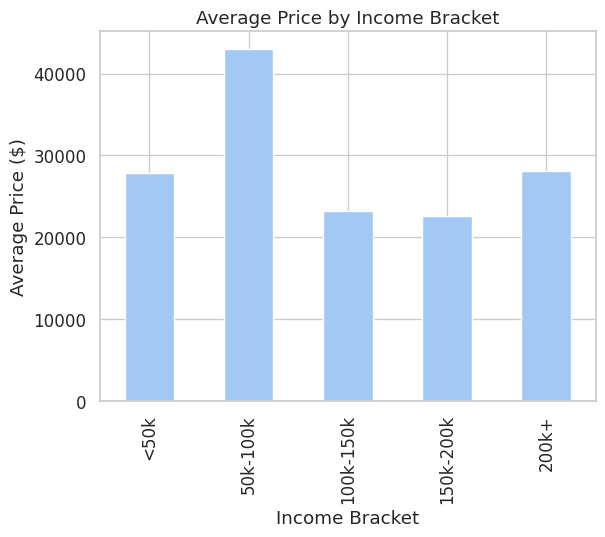

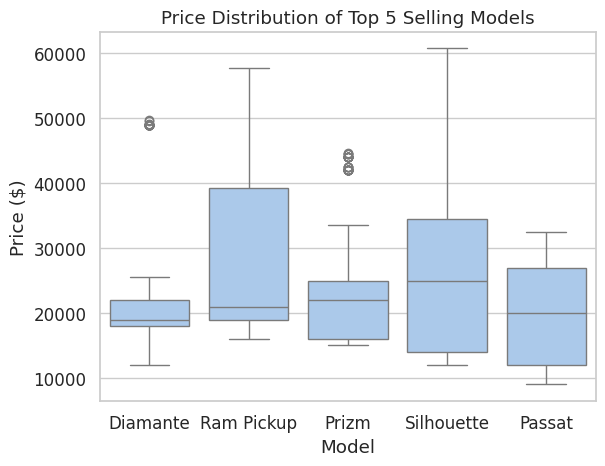


Average price by car color and engine type:
Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25766.451103       31732.967164
Pale White               30347.987460       24327.767694
Red                      27434.392314       30153.405229

Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


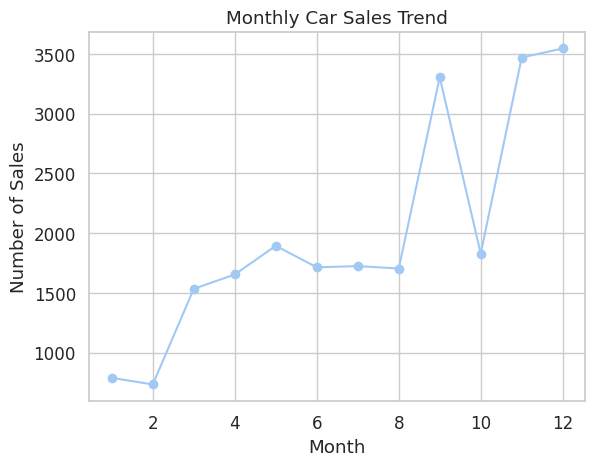

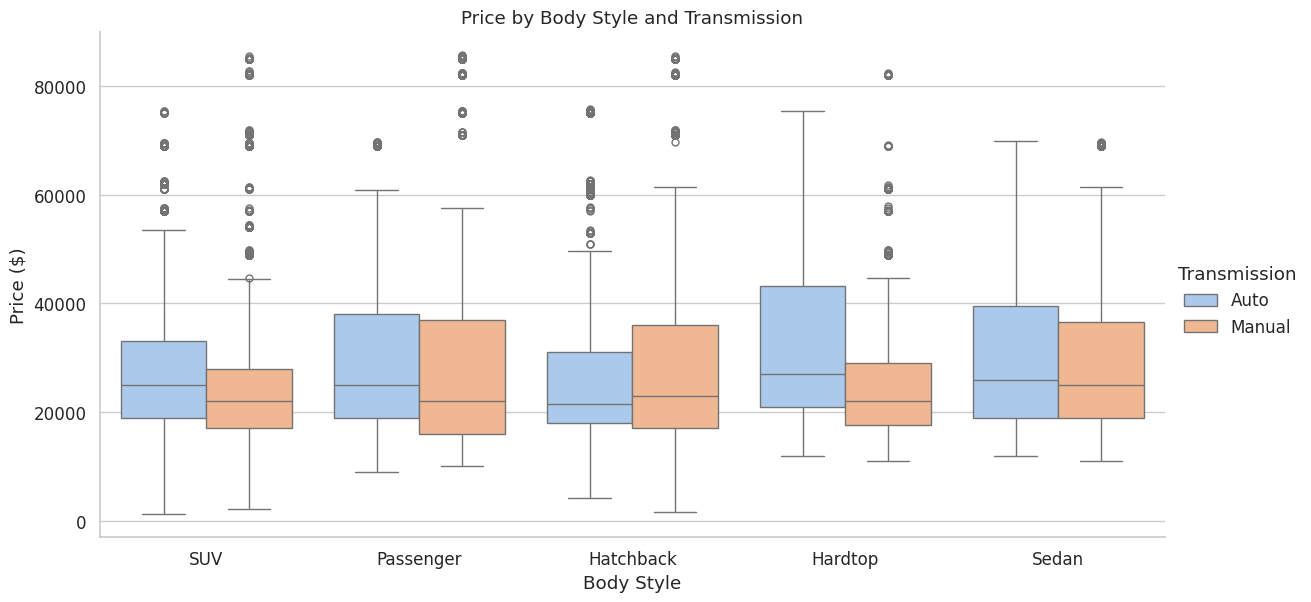


Correlation between price, engine size, and income:
               Price ($)  Engine_Num  Annual Income
Price ($)       1.000000         NaN       0.012065
Engine_Num           NaN         NaN            NaN
Annual Income   0.012065         NaN       1.000000


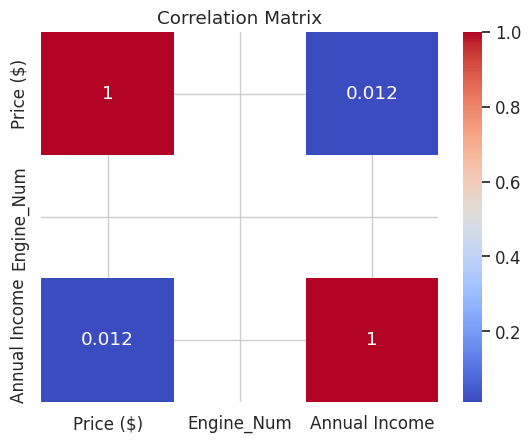


Average price by car model and engine type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117           0.000000
3000GT                 22764.326923       21770.659864
300M                   21394.888889           0.000000
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


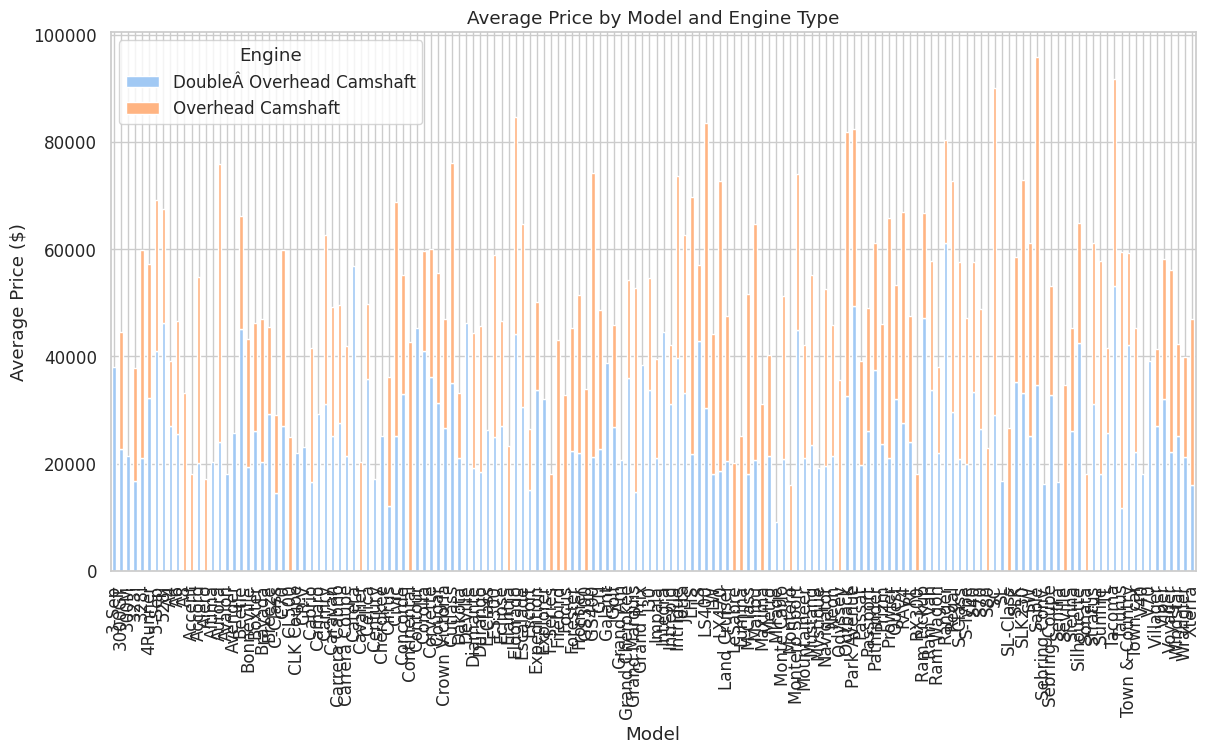

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline
sns.set(style='whitegrid', palette='pastel', font_scale=1.1)

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Get the uploaded filename (assumes only one file uploaded)
filename = list(uploaded.keys())[0]
print(f"Loaded file: {filename}")

# Load CSV file with automatic filename
df = pd.read_csv(filename)

# Strip whitespace from column names to avoid key errors
df.columns = df.columns.str.strip()
print("Columns in dataset:")
print(df.columns)

# Convert Date column to datetime, if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 1. Average selling price of cars for each dealer
if 'Dealer Name' in df.columns and 'Price ($)' in df.columns:
    avg_price_per_dealer = df.groupby('Dealer Name')['Price ($)'].mean().sort_values(ascending=False)
    print("\nAverage selling price per dealer:")
    print(avg_price_per_dealer)
    avg_price_per_dealer.plot(kind='bar', figsize=(12,6), title='Average Price by Dealer')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Columns 'Dealer Name' or 'Price ($)' not found.")

# 2. Car brand with the highest variation in prices
if 'Company' in df.columns and 'Price ($)' in df.columns:
    brand_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
    print("\nCar brand with highest price variation:")
    print(brand_variation.head(1))
    brand_variation.plot(kind='bar', figsize=(12,6), title='Price Variation by Brand')
    plt.ylabel('Standard Deviation')
    plt.show()
else:
    print("Columns 'Company' or 'Price ($)' not found.")

# 3. Distribution of car prices for each transmission type
if 'Transmission' in df.columns and 'Price ($)' in df.columns:
    print("\nPrice distribution statistics by transmission:")
    print(df.groupby('Transmission')['Price ($)'].describe()[['25%', '50%', '75%']])
    sns.boxplot(x='Transmission', y='Price ($)', data=df)
    plt.title('Price Distribution by Transmission Type')
    plt.show()
else:
    print("Columns 'Transmission' or 'Price ($)' not found.")

# 4. Distribution of car prices across different regions
if 'Dealer Region' in df.columns and 'Price ($)' in df.columns:
    sns.boxplot(x='Dealer Region', y='Price ($)', data=df)
    plt.title('Price Distribution Across Regions')
    plt.show()
else:
    print("Columns 'Dealer Region' or 'Price ($)' not found.")

# 5. Distribution of cars based on body styles
if 'Body Style' in df.columns:
    body_counts = df['Body Style'].value_counts()
    print("\nCar counts by body style:")
    print(body_counts)
    body_counts.plot(kind='bar', title='Number of Cars by Body Style')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'Body Style' not found.")

# 6. Average selling price of cars by customer gender and income
if {'Gender', 'Price ($)', 'Annual Income'}.issubset(df.columns):
    gender_income = df.groupby('Gender')[['Price ($)', 'Annual Income']].mean()
    print("\nAverage price and income by gender:")
    print(gender_income)
    sns.barplot(x='Gender', y='Price ($)', data=df)
    plt.title('Average Car Price by Gender')
    plt.show()
else:
    print("Columns 'Gender', 'Price ($)' or 'Annual Income' not found.")

# 7. Car price and number of cars sold by region
if 'Dealer Region' in df.columns and 'Price ($)' in df.columns:
    region_data = df.groupby('Dealer Region')['Price ($)'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
    print("\nAverage price and number of cars sold by region:")
    print(region_data)
    region_data['mean'].plot(kind='bar', title='Average Price by Region')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Columns 'Dealer Region' or 'Price ($)' not found.")

# 8. Average car price by engine type
if 'Engine' in df.columns and 'Price ($)' in df.columns:
    engine_avg = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
    print("\nAverage car price by engine type:")
    print(engine_avg)
    engine_avg.plot(kind='bar', title='Average Price by Engine Type')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Columns 'Engine' or 'Price ($)' not found.")

# 9. Car prices based on customer's annual income bracket
if 'Annual Income' in df.columns and 'Price ($)' in df.columns:
    df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, np.inf],
                                  labels=['<50k', '50k-100k', '100k-150k', '150k-200k', '200k+'])
    income_bracket_price = df.groupby('Income Bracket')['Price ($)'].mean()
    print("\nAverage price by income bracket:")
    print(income_bracket_price)
    income_bracket_price.plot(kind='bar', title='Average Price by Income Bracket')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Columns 'Annual Income' or 'Price ($)' not found.")

# 10. Top 5 car models with highest number of sales and their price distribution
if 'Model' in df.columns and 'Price ($)' in df.columns:
    top_models = df['Model'].value_counts().head(5).index
    sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
    plt.title('Price Distribution of Top 5 Selling Models')
    plt.show()
else:
    print("Columns 'Model' or 'Price ($)' not found.")

# 11. Car price variation by engine size and color
if 'Color' in df.columns and 'Engine' in df.columns and 'Price ($)' in df.columns:
    pivot_color_engine = df.pivot_table(index='Color', columns='Engine', values='Price ($)', aggfunc='mean')
    print("\nAverage price by car color and engine type:")
    print(pivot_color_engine)
    color_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
    print("\nColors with the highest price variation:")
    print(color_variation.head())
else:
    print("Columns 'Color', 'Engine' or 'Price ($)' not found.")

# 12. Seasonal trend in car sales
if 'Date' in df.columns:
    df['Month'] = df['Date'].dt.month
    monthly_sales = df['Month'].value_counts().sort_index()
    monthly_sales.plot(kind='line', marker='o', title='Monthly Car Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Number of Sales')
    plt.show()
else:
    print("Column 'Date' not found.")

# 13. Price distribution by body style and transmission type
if 'Body Style' in df.columns and 'Transmission' in df.columns and 'Price ($)' in df.columns:
    sns.catplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, kind='box', height=6, aspect=2)
    plt.title('Price by Body Style and Transmission')
    plt.show()
else:
    print("Columns 'Body Style', 'Transmission' or 'Price ($)' not found.")

# 14. Correlation between car price, engine size, and annual income
if {'Price ($)', 'Engine', 'Annual Income'}.issubset(df.columns):
    # Extract numeric part of engine size, if possible
    df['Engine_Num'] = df['Engine'].str.extract('(\d+\.?\d*)').astype(float)
    correlation_matrix = df[['Price ($)', 'Engine_Num', 'Annual Income']].corr()
    print("\nCorrelation between price, engine size, and income:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Columns 'Price ($)', 'Engine' or 'Annual Income' not found.")

# 15. Average price by car model and engine type
if {'Model', 'Engine', 'Price ($)'}.issubset(df.columns):
    model_engine_avg = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack().fillna(0)
    print("\nAverage price by car model and engine type:")
    print(model_engine_avg)
    model_engine_avg.plot(kind='bar', stacked=True, figsize=(14,7), title='Average Price by Model and Engine Type')
    plt.ylabel('Average Price ($)')
    plt.show()
else:
    print("Columns 'Model', 'Engine' or 'Price ($)' not found.")



# EDA - 3

👉 Upload your 'amazon.csv' file


Saving amazon.csv to amazon (1).csv


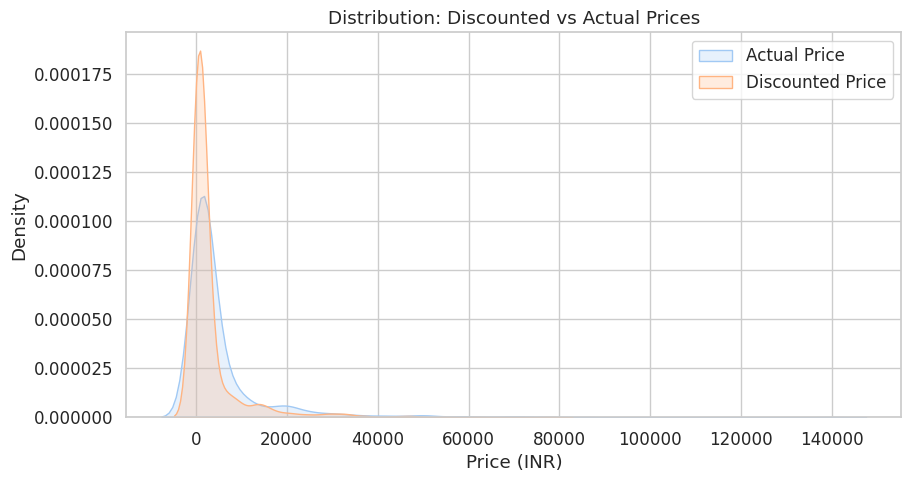


Q1: Average Rating per Category
 main_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64

Q2: Top Rating Count Products by Category
               main_category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable

In [18]:
# 📦 Install & import essentials (no install needed in Colab, but included for standalone use)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from google.colab import files

# 📂 Step 1: Upload the file
print("👉 Upload your 'amazon.csv' file")
uploaded = files.upload()

# ✅ Load uploaded file
df = pd.read_csv("amazon.csv")

# 🧹 Step 2: Data Cleaning
def clean_currency(val):
    return float(val.replace('₹', '').replace(',', '').strip()) if isinstance(val, str) else np.nan

def clean_percentage(val):
    return float(val.replace('%', '').strip()) if isinstance(val, str) else np.nan

def clean_number(val):
    return float(val.replace(',', '').strip()) if isinstance(val, str) and val.replace(',', '').replace('.', '').isdigit() else np.nan

df["discounted_price"] = df["discounted_price"].apply(clean_currency)
df["actual_price"] = df["actual_price"].apply(clean_currency)
df["discount_percentage"] = df["discount_percentage"].apply(clean_percentage)
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')
df["rating_count"] = df["rating_count"].apply(clean_number)
df["main_category"] = df["category"].apply(lambda x: x.split("|")[0] if isinstance(x, str) else x)

# 🧠 Q1: Average rating for each product category
avg_rating = df.groupby("main_category")["rating"].mean().sort_values(ascending=False)

# 🧠 Q2: Top rating count products by category
top_rating_products = df.loc[df.groupby("main_category")["rating_count"].idxmax()][["main_category", "product_name", "rating_count"]]

# 📊 Q3: Distribution of discounted prices vs actual prices
plt.figure(figsize=(10, 5))
sns.kdeplot(df["actual_price"], label="Actual Price", fill=True)
sns.kdeplot(df["discounted_price"], label="Discounted Price", fill=True)
plt.title("Distribution: Discounted vs Actual Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Density")
plt.legend()
plt.show()

# 🧠 Q4: Average discount percentage across categories
avg_discount = df.groupby("main_category")["discount_percentage"].mean().sort_values(ascending=False)

# 🧠 Q5: Most popular product names (by rating count)
popular_products = df.groupby("product_name")["rating_count"].sum().sort_values(ascending=False).head(10)

# 🧠 Q6: Most popular product keywords (min 4 letters, most frequent)
keywords = df["product_name"].dropna().apply(lambda x: re.findall(r'\b\w{4,}\b', x.lower()))
flat_keywords = [word for sublist in keywords for word in sublist if word.isalpha()]
popular_keywords = Counter(flat_keywords).most_common(10)

# 🧠 Q7: Most popular product reviews (by rating count)
df["combined_review"] = df["review_title"].astype(str) + " " + df["review_content"].astype(str)
popular_reviews = df.loc[df["rating_count"].nlargest(5).index][["product_name", "combined_review", "rating_count"]]

# 📈 Q8: Correlation between discounted price and rating
correlation = df[["discounted_price", "rating"]].corr().iloc[0, 1]

# 🧠 Q9: Top 5 categories based on highest average ratings
top_categories = avg_rating.head(5)

# 🧠 Q10: Optimization - Identify low-rated, low-discounted products
df["price_diff"] = df["actual_price"] - df["discounted_price"]
df["optimize_flag"] = ((df["rating"] < 3.5) & (df["discount_percentage"] < 30)).astype(int)
optimization_areas = df[df["optimize_flag"] == 1][["product_name", "main_category", "rating", "discount_percentage"]]

# ✅ Display all results
print("\nQ1: Average Rating per Category\n", avg_rating)
print("\nQ2: Top Rating Count Products by Category\n", top_rating_products)
print("\nQ4: Average Discount Percentage per Category\n", avg_discount)
print("\nQ5: Most Popular Product Names (by Rating Count)\n", popular_products)
print("\nQ6: Most Popular Product Keywords\n", popular_keywords)
print("\nQ7: Top 5 Popular Reviews\n", popular_reviews)
print("\nQ8: Correlation between Discounted Price and Rating: ", round(correlation, 3))
print("\nQ9: Top 5 Categories by Rating\n", top_categories)
print("\nQ10: Products to Optimize (Low Rating & Low Discount)\n", optimization_areas.head(10))

